<a href="https://colab.research.google.com/github/BrightX0/Bank-Note-Authentication-using-Keras-Sequential-Model/blob/main/Clothes2ClothesMapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This JNotebook Deals With Clothes to Clothes Image Mapping
It Will Deals With The....
1.   Removal of Background Masking From The Clothes
2.   Removing Stretches From the Clothes
3.   Restyling Clothes From the Background

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

In [ ]:
PATH = "/content/gdrive/MyDrive/Pix2Pix/"

import os 
os.chdir(PATH)

" ".join(sorted(os.listdir(PATH)))

In [ ]:
# The First Directory Such as ClothesX will be For The Features of the Training Data
# While the Features For The Target Column will Be ClothesY.....

import numpy as np
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import img_to_array,load_img
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras import Model,Input
from tensorflow.keras.layers import Conv2D,Conv2DTranspose,LeakyReLU,Activation,Concatenate,Dropout,BatchNormalization,LeakyReLU
from matplotlib import pyplot

# This Function Will be used to Iterate Over Files and Returning Arrays
def load_images(filename,size=(256,256)):
  image_arrays = []
  for root, dirs, files in tqdm(os.walk(PATH),desc=f'Converting The Images to Numpy from {filename}'):
      for dir in sorted(dirs):
        if dir.startswith(filename):
          print(f'Directory Length for {root} is {len(os.listdir(f"{root}/{dir}"))}')
          for file in sorted(os.listdir(f"{root}/{dir}")):
            ClothesFiles = f'{root}/{dir}/{file}'
            imageFile = load_img(ClothesFiles,target_size=size)
            image2array = img_to_array(imageFile)
            image_arrays.append(image2array)

        else: pass
  return np.array(image_arrays)

ClothesX = load_images('ClothesX')
ClothesY = load_images('ClothesY')

ClothesX.shape,ClothesY.shape

Converting The Images to Numpy from ClothesX: 0it [00:00, ?it/s]

Directory Length for /content/gdrive/MyDrive/Pix2Pix/Batch4 is 100



Converting The Images to Numpy from ClothesX: 2it [00:05,  2.81s/it]

Directory Length for /content/gdrive/MyDrive/Pix2Pix/Batch3 is 29



Converting The Images to Numpy from ClothesX: 5it [00:09,  1.84s/it]

Directory Length for /content/gdrive/MyDrive/Pix2Pix/Batch7 is 100



Converting The Images to Numpy from ClothesX: 8it [00:17,  2.12s/it]

Directory Length for /content/gdrive/MyDrive/Pix2Pix/Batch1 is 100



Converting The Images to Numpy from ClothesX: 11it [00:18,  1.47s/it]

Directory Length for /content/gdrive/MyDrive/Pix2Pix/Batch2 is 29



Converting The Images to Numpy from ClothesX: 14it [00:24,  1.63s/it]

Directory Length for /content/gdrive/MyDrive/Pix2Pix/Batch5 is 100



Converting The Images to Numpy from ClothesX: 17it [00:31,  1.84s/it]

Directory Length for /content/gdrive/MyDrive/Pix2Pix/Batch9 is 99



Converting The Images to Numpy from ClothesX: 20it [00:46,  2.89s/it]

Directory Length for /content/gdrive/MyDrive/Pix2Pix/Batch8 is 100



Converting The Images to Numpy from ClothesX: 25it [00:51,  2.06s/it]
Converting The Images to Numpy from ClothesY: 0it [00:00, ?it/s]

Directory Length for /content/gdrive/MyDrive/Pix2Pix/Batch4 is 100



Converting The Images to Numpy from ClothesY: 2it [00:00,  2.99it/s]

Directory Length for /content/gdrive/MyDrive/Pix2Pix/Batch3 is 29



Converting The Images to Numpy from ClothesY: 5it [00:04,  1.02it/s]

Directory Length for /content/gdrive/MyDrive/Pix2Pix/Batch7 is 100



Converting The Images to Numpy from ClothesY: 8it [00:05,  1.67it/s]

Directory Length for /content/gdrive/MyDrive/Pix2Pix/Batch1 is 100



Converting The Images to Numpy from ClothesY: 11it [00:07,  1.41it/s]

Directory Length for /content/gdrive/MyDrive/Pix2Pix/Batch2 is 29



Converting The Images to Numpy from ClothesY: 14it [00:10,  1.22it/s]

Directory Length for /content/gdrive/MyDrive/Pix2Pix/Batch5 is 100



Converting The Images to Numpy from ClothesY: 17it [00:11,  1.60it/s]

Directory Length for /content/gdrive/MyDrive/Pix2Pix/Batch9 is 99



Converting The Images to Numpy from ClothesY: 20it [00:24,  1.84s/it]

Directory Length for /content/gdrive/MyDrive/Pix2Pix/Batch8 is 100



Converting The Images to Numpy from ClothesY: 25it [00:25,  1.00s/it]


((657, 256, 256, 3), (657, 256, 256, 3))

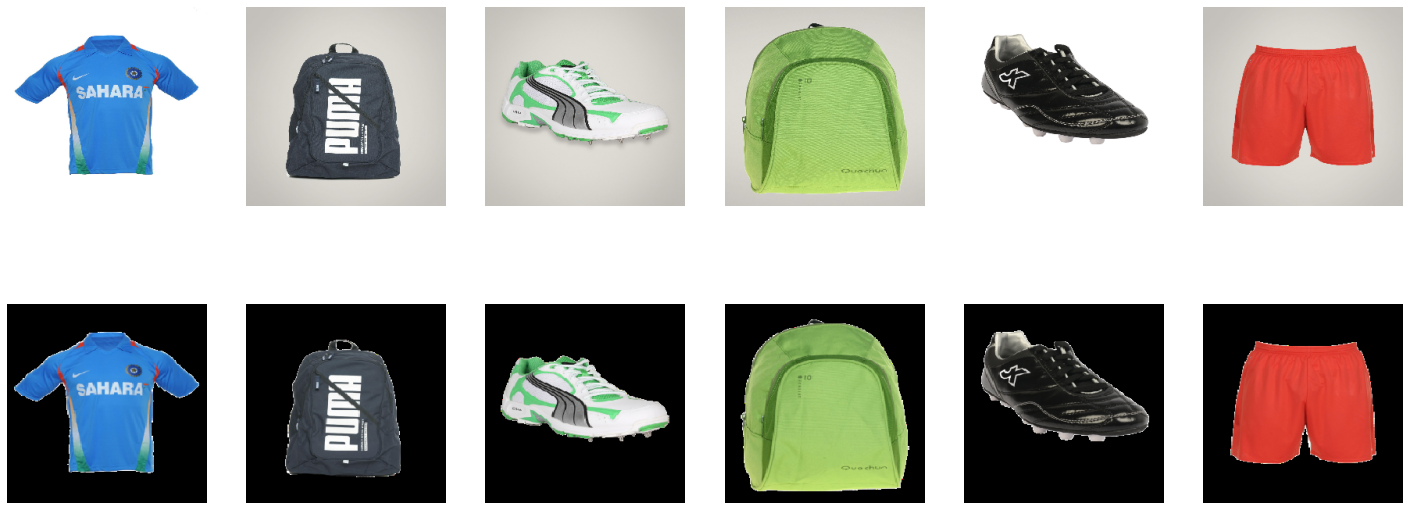

In [ ]:
from matplotlib import pyplot
from matplotlib.pyplot import figure

figure(figsize=(25, 10))

# plot source images
n_samples = 6
for i in range(n_samples):
 pyplot.subplot(2, n_samples, 1 + i)
 pyplot.axis('off')
 pyplot.imshow(ClothesX[i].astype('uint64'))
 
# plot target image
for i in range(n_samples):
 pyplot.subplot(2, n_samples, 1 + n_samples + i)
 pyplot.axis('off')
 pyplot.imshow(ClothesY[i].astype('uint64'))
pyplot.show()

In [ ]:
# Defining The Discriminator to be used to distinguish btn the Real Images and Sythentic images....
def discriminator(image_shape=(256,256,3)):
  init = RandomNormal(0.02)

  # Creating an input imageShape...
  input_src_image = Input(shape=image_shape)

  # Creating a Target ImageShape....
  input_target_image = Input(shape=image_shape)

  # Merging The Two Shape of images
  merged = Concatenate()([input_src_image,input_target_image]) # The Expected Shape After Merging is [225,225,6]

  # C64
  d = Conv2D(64, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(merged)
  d = LeakyReLU(alpha=0.2)(d)

  # C128
  d = Conv2D(128, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
  d = BatchNormalization()(d)
  d = LeakyReLU(alpha=0.2)(d)

  # C256
  d = Conv2D(256, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
  d = BatchNormalization()(d)
  d = LeakyReLU(alpha=0.2)(d)

  # C512
  d = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
  d = BatchNormalization()(d)
  d = LeakyReLU(alpha=0.2)(d)

  # second last output layer
  d = Conv2D(512, (4,4), padding='same', kernel_initializer=init)(d)
  d = BatchNormalization()(d)
  d = LeakyReLU(alpha=0.2)(d)
  
  # patch output
  d = Conv2D(1, (4,4), padding='same', kernel_initializer=init)(d)
  patch_out = Activation('sigmoid')(d)

  # define model
  model = Model([input_src_image, input_target_image], patch_out)
  
  # compile model
  opt = Adam(learning_rate=0.0002, beta_1=0.5,beta_2=0.999)
  model.compile(loss='binary_crossentropy', optimizer='Adam', loss_weights=[0.5])
  return model

# from tensorflow.keras.utils import plot_model
# plot_model(display_model,show_shapes=True)

In [ ]:
# The Generator is made by Specifying the Encoder and Decoder block architecture 
# Similar To U-Net Architecture....
# Creating Helper Functions 

# define an encoder block
def define_encoder_block(layer_in, n_filters, batchnorm=True):
 # weight initialization
 init = RandomNormal(stddev=0.02)

 # add downsampling layer
 g = Conv2D(n_filters, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(layer_in)

 # conditionally add batch normalization
 if batchnorm: g = BatchNormalization()(g, training=True)

 # leaky relu activation
 g = LeakyReLU(alpha=0.2)(g)
 return g

 # define a decoder block
def decoder_block(layer_in, skip_in, n_filters, dropout=True):
 # weight initialization
 init = RandomNormal(stddev=0.02)

 # add upsampling layer
 g = Conv2DTranspose(n_filters, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(layer_in)

 # add batch normalization
 g = BatchNormalization()(g, training=True)

 # conditionally add dropout
 if dropout: g = Dropout(0.5)(g, training=True)

 # merge with skip connection
 g = Concatenate()([g, skip_in])

 # relu activation
 g = Activation('relu')(g)
 return g

# define the standalone generator model
def Generator(image_shape=(256,256,3)):
  
 # weight initialization
 init = RandomNormal(stddev=0.02)

 # image input
 in_image = Input(shape=image_shape)

 # encoder model
 e1 = define_encoder_block(in_image, 64, batchnorm=False)
 e2 = define_encoder_block(e1, 128)
 e3 = define_encoder_block(e2, 256)
 e4 = define_encoder_block(e3, 512)
 e5 = define_encoder_block(e4, 512)
 e6 = define_encoder_block(e5, 512)
 e7 = define_encoder_block(e6, 512)

 # bottleneck, no batch norm and relu
 b = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(e7)
 b = Activation('relu')(b)

 # decoder model
 d1 = decoder_block(b, e7, 512)
 d2 = decoder_block(d1, e6, 512)
 d3 = decoder_block(d2, e5, 512)
 d4 = decoder_block(d3, e4, 512, dropout=False)
 d5 = decoder_block(d4, e3, 256, dropout=False)
 d6 = decoder_block(d5, e2, 128, dropout=False)
 d7 = decoder_block(d6, e1, 64, dropout=False)

 # output
 g = Conv2DTranspose(3, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d7)
 out_image = Activation('tanh')(g)
 
 # define model
 model = Model(in_image, out_image)
 return model

In [ ]:
# define the combined generator and discriminator model, for updating the generator
def GAN(g_model, d_model, image_shape=(256,256,3)):
 # make weights in the discriminator not trainable
 for layer in d_model.layers: 
   if not isinstance(layer, BatchNormalization):
     layer.trainable = False

 # define the source image
 in_src = Input(shape=image_shape)

 # connect the source image to the generator input
 gen_out = g_model(in_src)

 # connect the source input and generator output to the discriminator input
 dis_out = d_model([in_src, gen_out])

 # src image as input, generated image and classification output
 model = Model(in_src, [dis_out, gen_out])

 # compile model
#  opt = Adam(learning_rate=0.0002, beta_1=0.5)
 model.compile(loss=['binary_crossentropy', 'mae'], optimizer='Adam', loss_weights=[1,100])
 return model

In [ ]:
X1, X2 = ClothesX,ClothesY

# scale from [0,255] to [-1,1]
X1 = (X1 - 127.5) / 127.5
X2 = (X2 - 127.5) / 127.5

In [ ]:
# select a batch of random samples, returns images and target
def generate_real_samples(dataset, n_samples, patch_shape):

 # unpack dataset
 trainA, trainB = dataset

 # choose random instances
 ix = np.random.randint(0,trainA.shape[0], n_samples)

 # retrieve selected images
 X1, X2 = trainA[ix], trainB[ix]

 # generate 'real' class labels (1)
 y = np.ones((n_samples, patch_shape, patch_shape, 1))
 return [X1, X2], y

In [ ]:
# generate a batch of images, returns images and targets
def generate_fake_samples(g_model, samples, patch_shape):

 # generate fake instance
 X = g_model.predict(samples)

 # create 'fake' class labels (0)
 y = np.zeros((len(X), patch_shape, patch_shape, 1))
 return X, y

In [ ]:
# generate samples and save as a plot and save the model
def summarize_performance(step, g_model, dataset, n_samples=7):
 # select a sample of input images
 [X_realA, X_realB], _ = generate_real_samples(dataset, n_samples, 1)
 # generate a batch of fake samples
 X_fakeB, _ = generate_fake_samples(g_model, X_realA, 1)

 # scale all pixels from [-1,1] to [0,1]
 X_realA = (X_realA + 1) / 2.0
 X_realB = (X_realB + 1) / 2.0
 X_fakeB = (X_fakeB + 1) / 2.0

 figure(figsize=(25, 10))

 # plot real source images
 for i in range(n_samples):
  pyplot.subplot(3, n_samples, 1 + i)
  pyplot.axis('off')
  pyplot.imshow(X_realA[i])

 # plot generated target image
 for i in range(n_samples):
  pyplot.subplot(3, n_samples, 1 + n_samples + i)
  pyplot.axis('off')
  pyplot.imshow(X_fakeB[i])
  
 # plot real target image
 for i in range(n_samples):
  pyplot.subplot(3, n_samples, 1 + n_samples*2 + i)
  pyplot.axis('off')
  pyplot.imshow(X_realB[i])

 # save plot to file
 filename1 = 'plot_%06d.png' % (step+1)
 pyplot.savefig(filename1)
 pyplot.close()

 # save the generator model
 filename2 = 'ClothesTranslation.h5'
 g_model.save(filename2)
 print('>Saved: %s and %s' % (filename1, filename2))

In [ ]:
from IPython.display import clear_output

# train pix2pix model
def train(d_model, g_model, gan_model, dataset, n_epochs=1500,n_batch=128):

 # determine the output square shape of the discriminator
 n_patch = d_model.output_shape[1]

 # unpack dataset
 trainA, trainB = dataset

 # calculate the number of batches per training epoch
 bat_per_epo = int(len(trainA) / n_batch)

 # calculate the number of training iterations
 n_steps = bat_per_epo * n_epochs

 # manually enumerate epochs
 for i in range(n_steps):
   
  # select a batch of real samples
  [X_realA, X_realB], y_real = generate_real_samples(dataset, n_batch, n_patch)

  # generate a batch of fake samples
  X_fakeB, y_fake = generate_fake_samples(g_model, X_realA, n_patch)

  # update discriminator for real samples
  d_loss1 = d_model.train_on_batch([X_realA, X_realB], y_real)

  # update discriminator for generated samples
  d_loss2 = d_model.train_on_batch([X_realA, X_fakeB], y_fake)

  # update the generator
  g_loss, _, _ = gan_model.train_on_batch(X_realA, [y_real, X_realB])

  # Clearing The Output....
  clear_output(wait=True)
  
  # summarize performance...
  print('>%d, d1[%.3f] d2[%.3f] g[%.3f]' % (i+1, d_loss1, d_loss2, g_loss))
  
  # summarize model performance...
  if (i+1) % (bat_per_epo * 10) == 0: summarize_performance(i, g_model, dataset)

In [ ]:
# load image data...
dataset = X1,X2
print('Loaded', dataset[0].shape, dataset[1].shape)

# define input shape based on the loaded dataset...
image_shape = dataset[0].shape[1:]

# define the models...
d_model = discriminator(image_shape)
g_model = Generator(image_shape)

# define the composite model...
gan_model = GAN(g_model, d_model, image_shape)

# train model...
train(d_model, g_model, gan_model, dataset)

>4057, d1[0.353] d2[0.364] g[2.404]
4/4 [==============================] - 0s 22ms/step


KeyboardInterrupt: ignored

In [ ]:
pred = g_model.predict(X2)

21/21 [==============================] - 1s 37ms/step


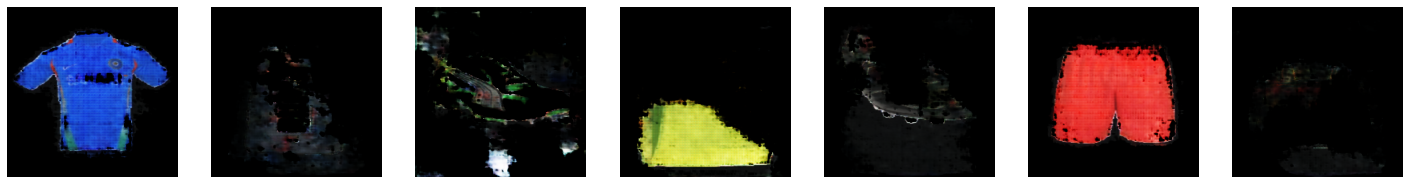

In [ ]:
n_samples = 7
pred = (pred + 1) / 2.0
figure(figsize=(25, 10))


for i in range(n_samples):
  pyplot.subplot(2, n_samples, 1 + i)
  pyplot.axis('off')
  pyplot.imshow(pred[i])